In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Then, the HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

# z=0.67

## Interlude, Galactic MnII

Contaminating CIV

In [8]:
z_mw = -8.04e-05 #-0.0000802 

In [9]:
np.round(-0.0000802-((1-0.0000802)*0.06/3e+5), 8)

-8.04e-05

### MnII 2576

In [10]:
mnii_2576_stis = ion_transition('MnII', 2576, 'Mn', z_mw, 'STIS')

In [11]:
mnii_2576_stis.grab_ion_transition_info()

In [12]:
mnii_2576_stis.grab_ion_transition_spec(spec_fits_list)

In [13]:
mnii_2576_stis.cont_norm_flux(v_abs_range=[-50,95], degree=1)

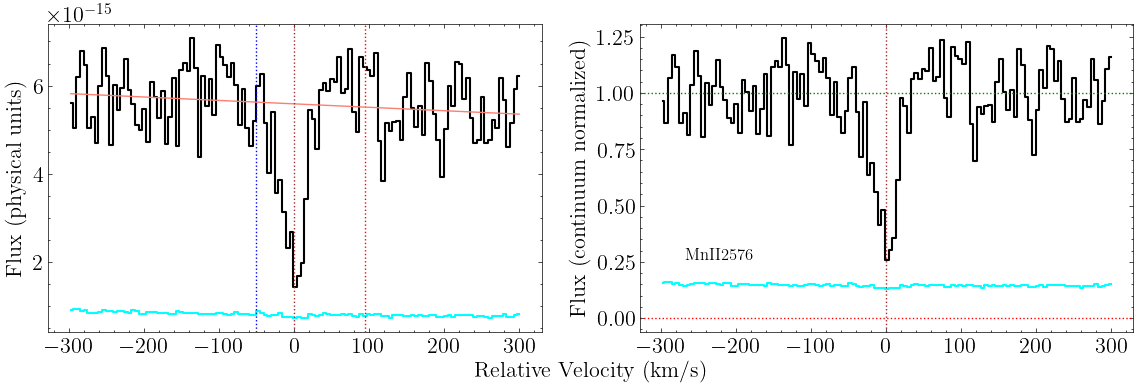

In [14]:
fig, ax = mnii_2576_stis.plot_ion_transition_spec_cont()

In [15]:
mnii_2576_stis.grab_ion_transition_lsf(lsf_fits_list)

In [16]:
mnii_2576_stis.init_ion_transition(init_values = np.array([[13.1,10, 0]]), 
                             lsf_convolve = True)

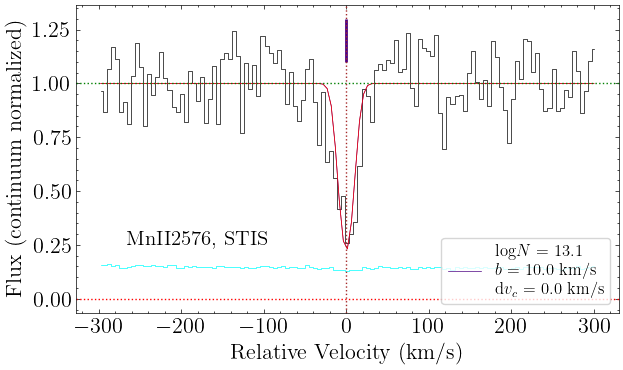

In [17]:
fig, ax = mnii_2576_stis.plot_ion_transition_init_fit()

In [18]:
mnii_2576_stis.fit_ion_transition()

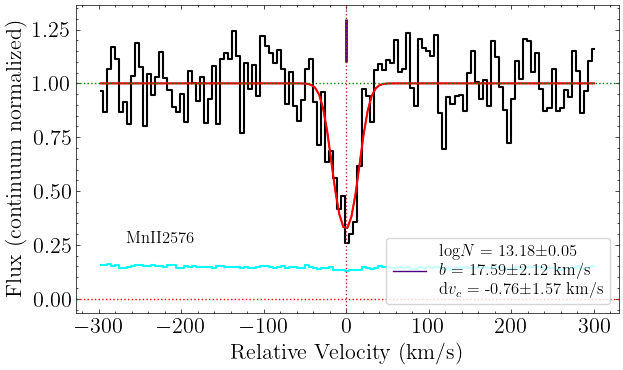

In [19]:
fig, ax = mnii_2576_stis.plot_ion_transition_best_fit()

### MnII 2606

In [20]:
mnii_2606_stis = ion_transition('MnII', 2606, 'Mn', z_mw, 'STIS')

In [21]:
mnii_2606_stis.grab_ion_transition_info()

In [22]:
mnii_2606_stis.grab_ion_transition_spec(spec_fits_list)

In [23]:
mnii_2606_stis.cont_norm_flux(v_abs_range=[-50,95], degree=1)

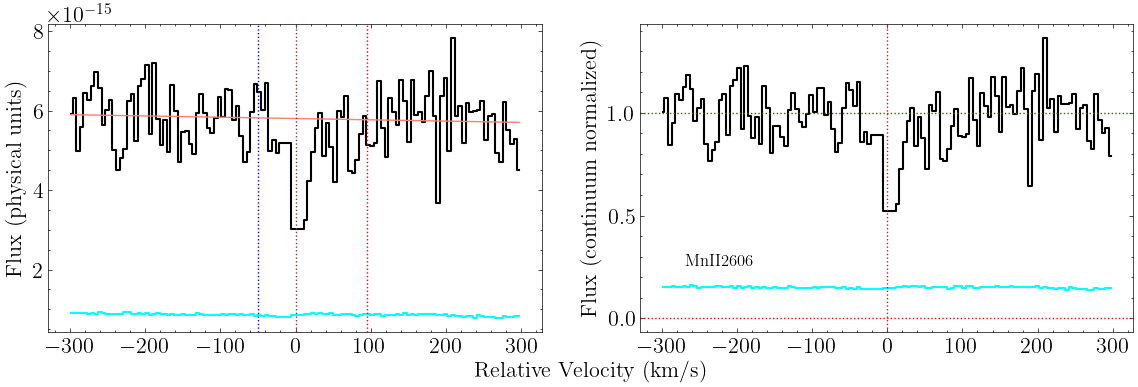

In [24]:
fig, ax = mnii_2606_stis.plot_ion_transition_spec_cont()

In [25]:
mnii_2606_stis.grab_ion_transition_lsf(lsf_fits_list)

In [26]:
mnii_2606_stis.init_ion_transition(init_values = np.array([[14.2,10, 0]]), 
                             lsf_convolve = True)

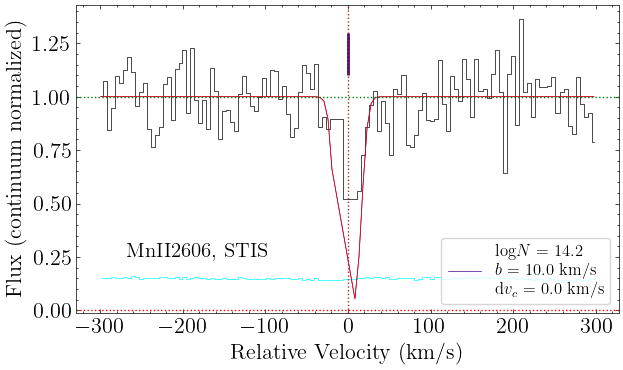

In [27]:
fig, ax = mnii_2606_stis.plot_ion_transition_init_fit()

In [28]:
mnii_2606_stis.fit_ion_transition()

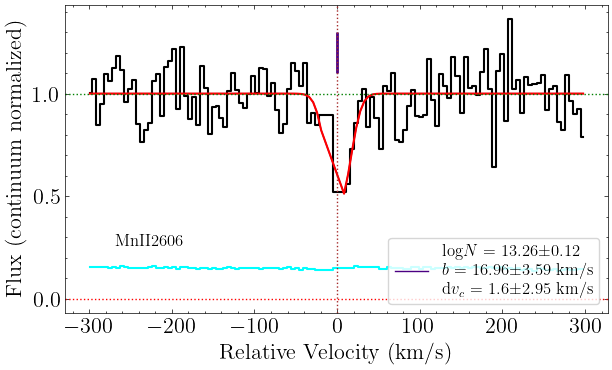

In [29]:
fig, ax = mnii_2606_stis.plot_ion_transition_best_fit()

### MnII

In [30]:
mnii = ion(z_mw, 'MnII', [mnii_2576_stis, mnii_2606_stis])

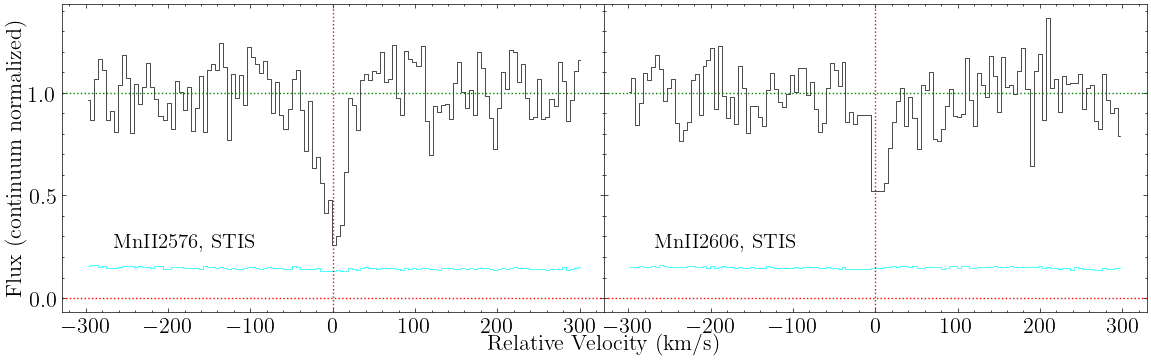

In [31]:
fig, axes = mnii.plot_ion()

In [32]:
mnii.init_ion([mnii_2576_stis.best_values,
             mnii_2576_stis.best_values])

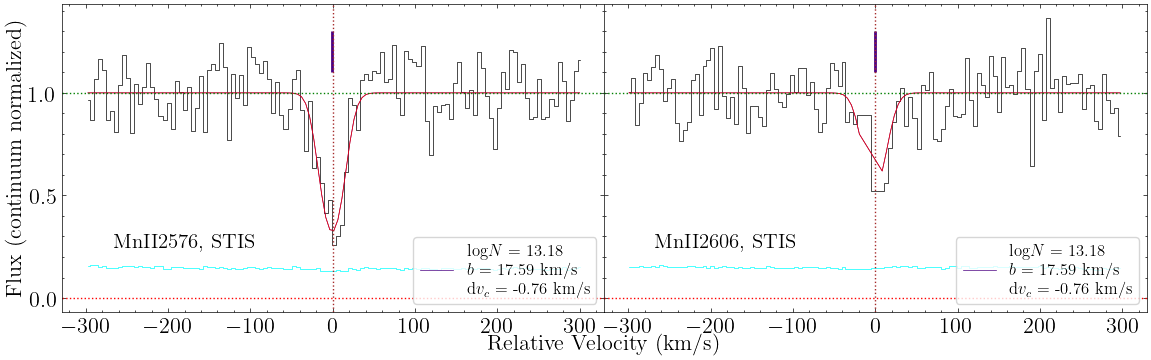

In [33]:
fig, axes = mnii.plot_ion_init_fit()

In [34]:
mnii.fit_ion(tie_params_list=[['it1c1_logN','it2c1_logN'],
                             ['it1c1_b','it2c1_b'], 
                             ['it1c1_dv_c','it2c1_dv_c']])

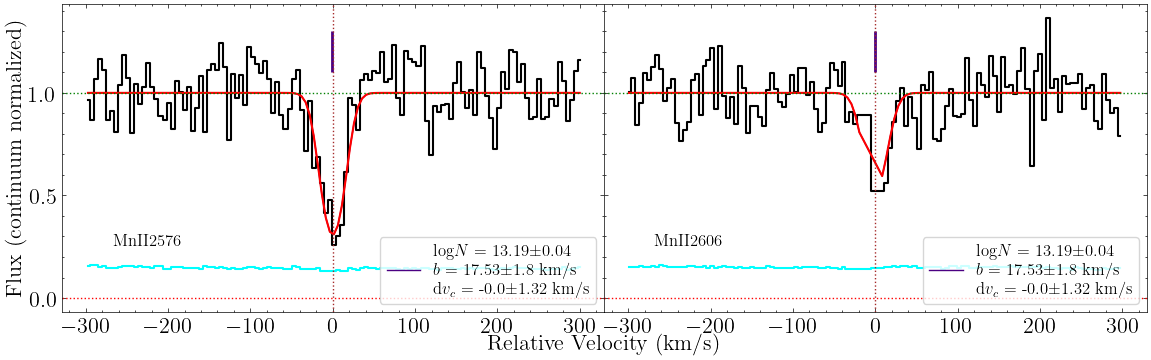

In [35]:
fig, axes = mnii.plot_ion_best_fit()

In [36]:
#mnii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-6, n_walkers=200, n_steps=5000)
mnii.fit_ion_emcee(load=True, loaddir=rootdir)

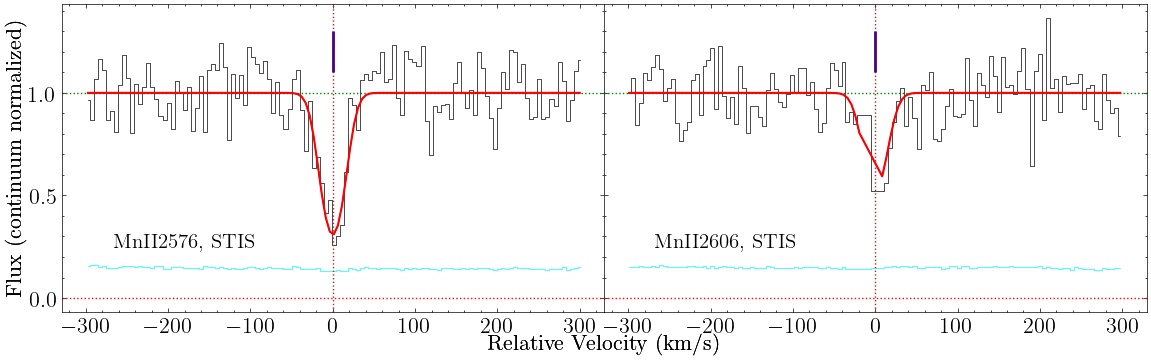

In [37]:
fig, axes = mnii.plot_samples()

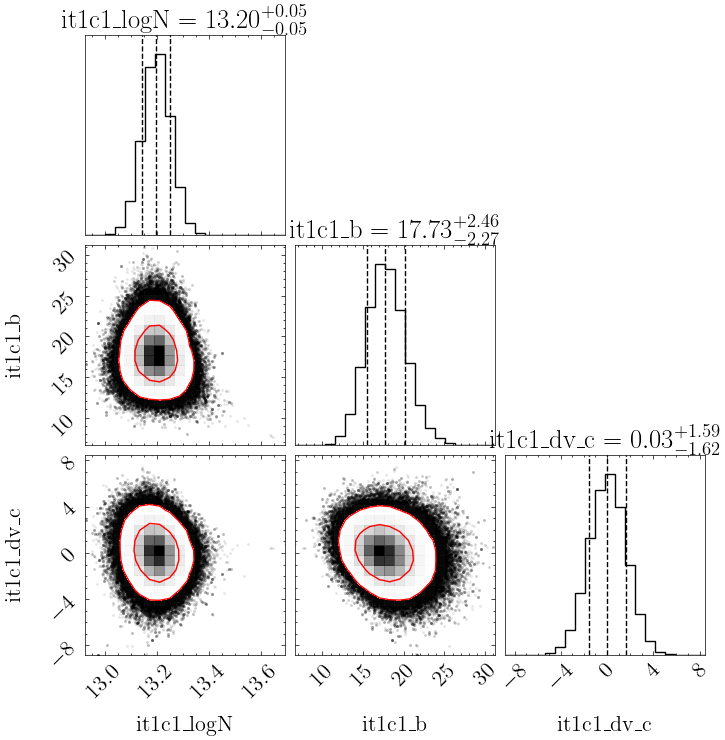

In [38]:
mnii.plot_corner()

### MnII 2594

In [39]:
mnii_2594_stis = ion_transition('MnII', 2594, 'Mn', z_mw, 'STIS')

In [40]:
mnii_2594_stis.grab_ion_transition_info()

In [41]:
mnii_2594_stis.grab_ion_transition_spec(spec_fits_list)

In [42]:
mnii_2594_stis.cont_norm_flux(v_abs_range=[-140,95], degree=1)

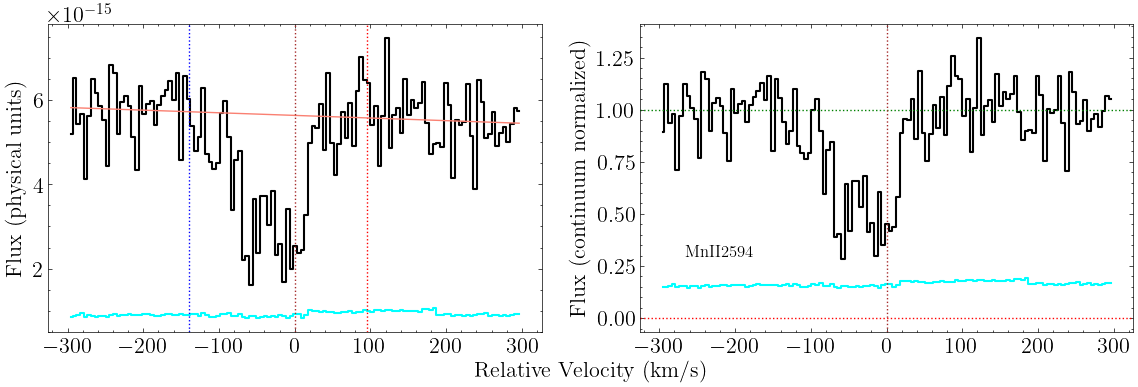

In [43]:
fig, ax = mnii_2594_stis.plot_ion_transition_spec_cont()

In [44]:
mnii_2594_stis.grab_ion_transition_lsf(lsf_fits_list)

In [45]:
mnii_2594_stis.init_ion_transition(init_values = np.array([[13.20,18,0]]), 
                             lsf_convolve = True)

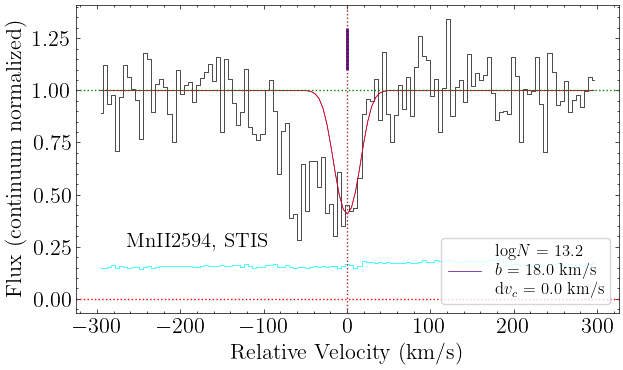

In [46]:
fig, ax = mnii_2594_stis.plot_ion_transition_init_fit()

## CIV

### CIV 1548

In [47]:
#np.round(0.67530885+((1+0.67530885)*26.6/3e+5), 8)

In [48]:
z_067 = 0.67545705

In [49]:
civ_1548_067 = ion_transition('CIV', 1548, 'C', z_067, 'STIS')

In [50]:
civ_1548_067.grab_ion_transition_info()

In [51]:
civ_1548_067.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-270],[-100,-45]])

In [52]:
civ_1548_067.cont_norm_flux(v_abs_range=[-100,100], degree=1)

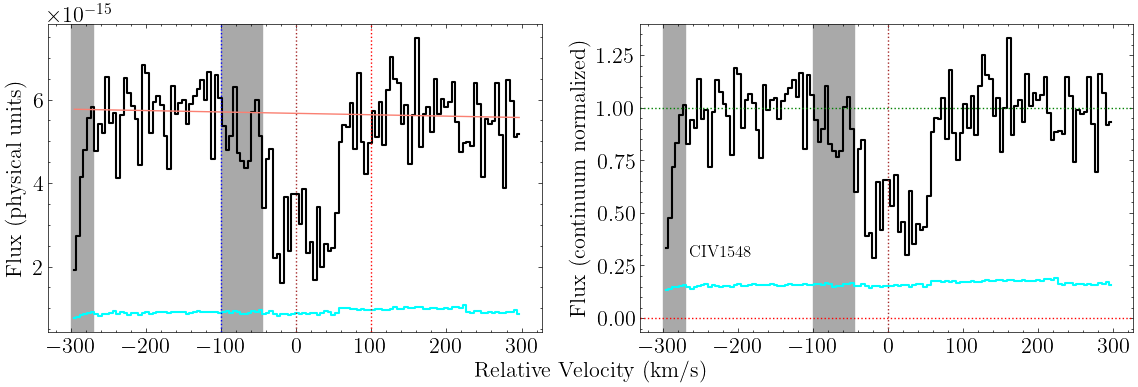

In [53]:
fig, ax = civ_1548_067.plot_ion_transition_spec_cont()

In [54]:
dv_c_mnii_2594_stis = 3e+5*((mnii_2594_stis.wav0_obs-civ_1548_067.wav0_obs)/civ_1548_067.wav0_obs)

In [55]:
mnii_flux_interp = np.interp(civ_1548_067.v, mnii_2594_stis.v+dv_c_mnii_2594_stis, mnii_2594_stis.init_total_flux)

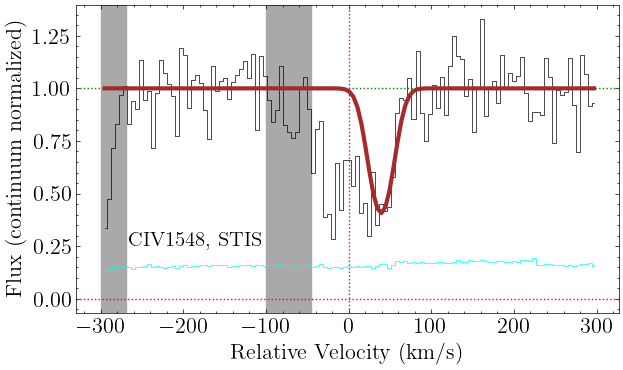

In [56]:
fig, ax = civ_1548_067.plot_ion_transition_spec()
ax.plot(civ_1548_067.v, mnii_flux_interp, color='brown', lw=3)

In [57]:
civ_1548_067.flux_norm = civ_1548_067.flux_norm/mnii_flux_interp

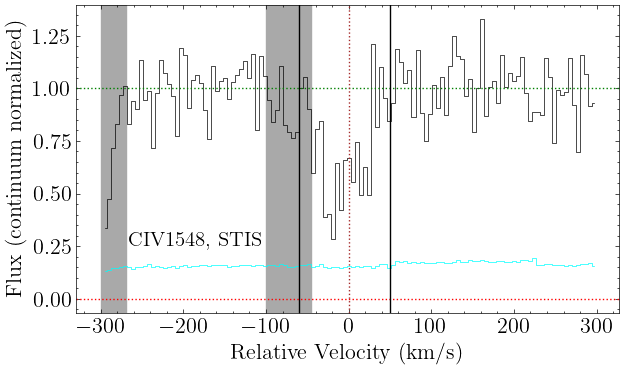

In [58]:
fig, ax = civ_1548_067.plot_ion_transition_spec()#label_axes=False)
ax.axvline(-60)
ax.axvline(50)

### CIV 1550

In [59]:
civ_1550_067 = ion_transition('CIV', 1550, 'C', z_067, 'STIS')

In [60]:
civ_1550_067.grab_ion_transition_info()

In [61]:
civ_1550_067.grab_ion_transition_spec(spec_fits_list, masks=[[90,270]])

In [62]:
civ_1550_067.cont_norm_flux(v_abs_range=[-50,50], degree=2)

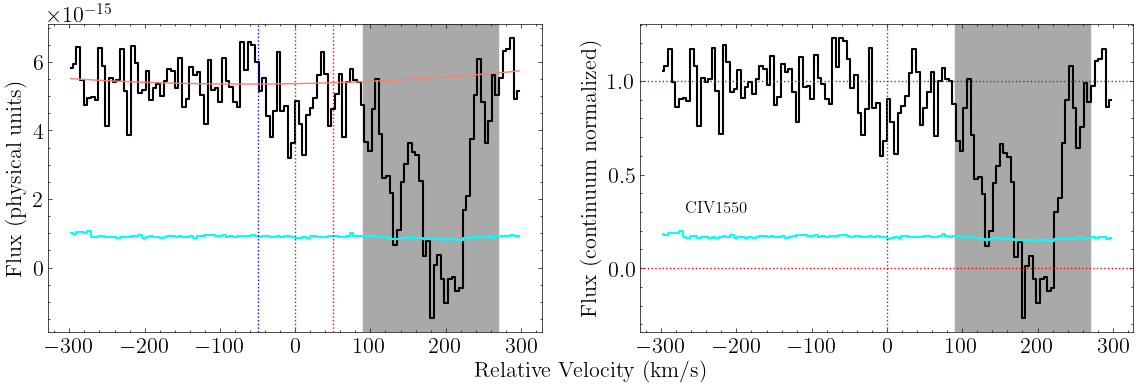

In [63]:
fig, ax = civ_1550_067.plot_ion_transition_spec_cont()

## OIV

### OIV 787

In [64]:
oiv_787_067 = ion_transition('OIV', 787, 'O', z_067, 'FUV')

In [65]:
oiv_787_067.grab_ion_transition_info(delta_v=6)

In [66]:
oiv_787_067.grab_ion_transition_spec(spec_fits_list, masks=[[-250,-85]])

In [67]:
oiv_787_067.cont_norm_flux(v_abs_range=[-85,85], degree=1)

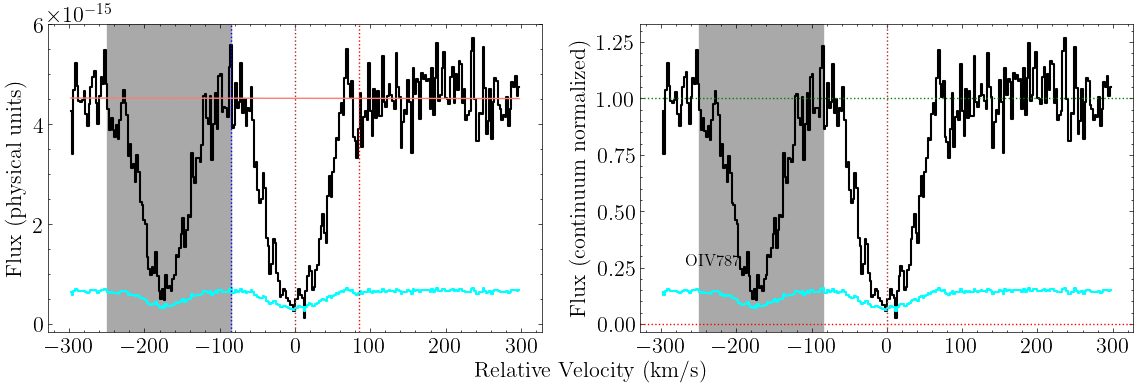

In [68]:
fig, ax = oiv_787_067.plot_ion_transition_spec_cont()

## OVI

### OVI 1031

In [69]:
ovi_1031_067 = ion_transition('OVI', 1031, 'O', z_067, 'FUV')

In [70]:
ovi_1031_067.grab_ion_transition_info(delta_v = 14.5)

In [71]:
ovi_1031_067.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-120],[180,290]])

In [72]:
ovi_1031_067.cont_norm_flux(v_abs_range=[-85,85], degree=1)

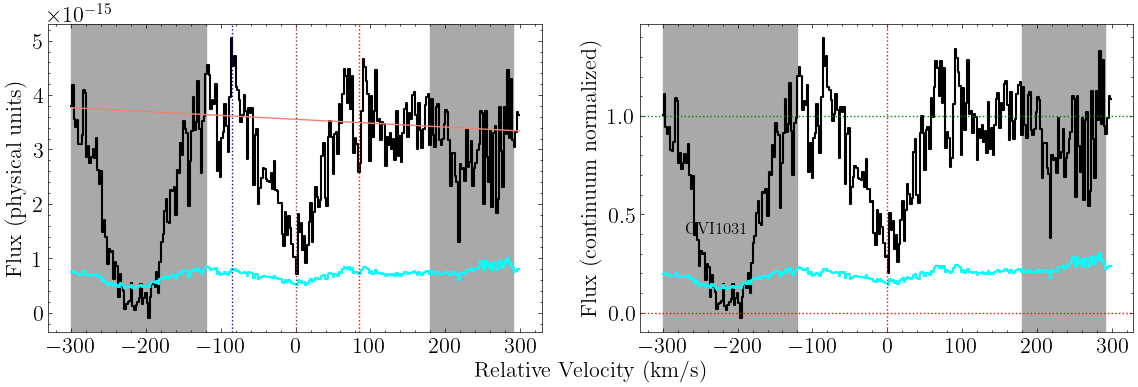

In [73]:
fig, ax = ovi_1031_067.plot_ion_transition_spec_cont()

# z = 1.04

## CIV

### CIV 1548

In [74]:
z_104 = 1.04430763

In [75]:
civ_1548_104 = ion_transition('CIV', 1548, 'C', z_104, 'HIRES')

In [76]:
civ_1548_104.grab_ion_transition_info()

In [77]:
civ_1548_104.grab_ion_transition_spec(spec_fits_list, masks=[[-40,-15],[50,70],[115,140]])

In [78]:
civ_1548_104.cont_norm_flux(v_abs_range=[-40,150], degree=1)

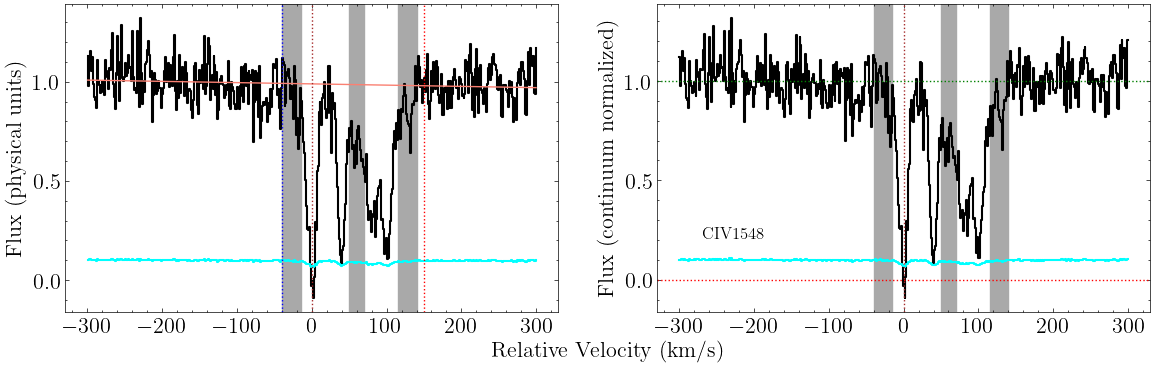

In [79]:
fig, ax = civ_1548_104.plot_ion_transition_spec_cont()

### CIV 1550 (HIRES)

In [80]:
civ_1550_104 = ion_transition('CIV', 1550, 'C', z_104, 'HIRES')

In [81]:
civ_1550_104.grab_ion_transition_info()

In [82]:
civ_1550_104.grab_ion_transition_spec(spec_fits_list, masks=[[-20,-10],[50,70],[110,140]])

In [83]:
civ_1550_104.cont_norm_flux(v_abs_range=[-20,140], degree=1)

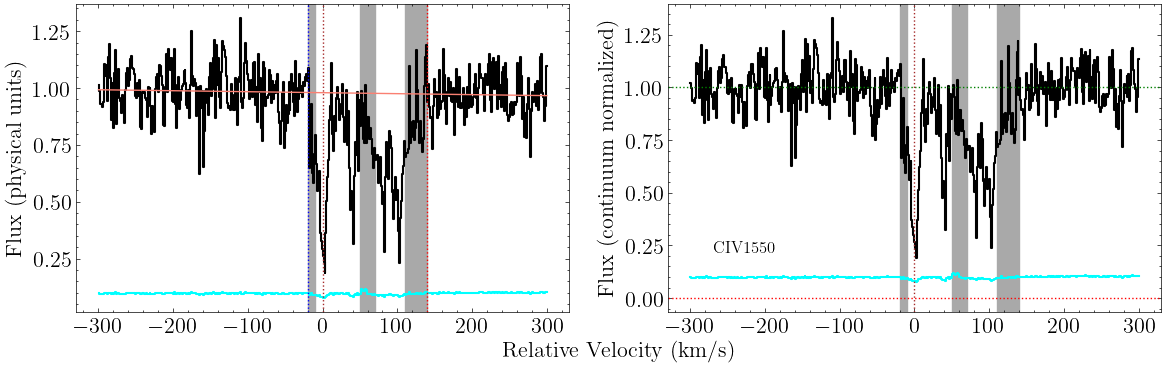

In [84]:
fig, ax = civ_1550_104.plot_ion_transition_spec_cont()

## OIV

### OIV 608

In [85]:
oiv_608_104 = ion_transition('OIV', 608, 'O', z_104, 'FUV')

In [86]:
oiv_608_104.grab_ion_transition_info()

In [87]:
oiv_608_104.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-140],[-30,-10],[105,140]])#,[110,150]])

In [88]:
oiv_608_104.cont_norm_flux(v_abs_range=[-50,140], degree=1)

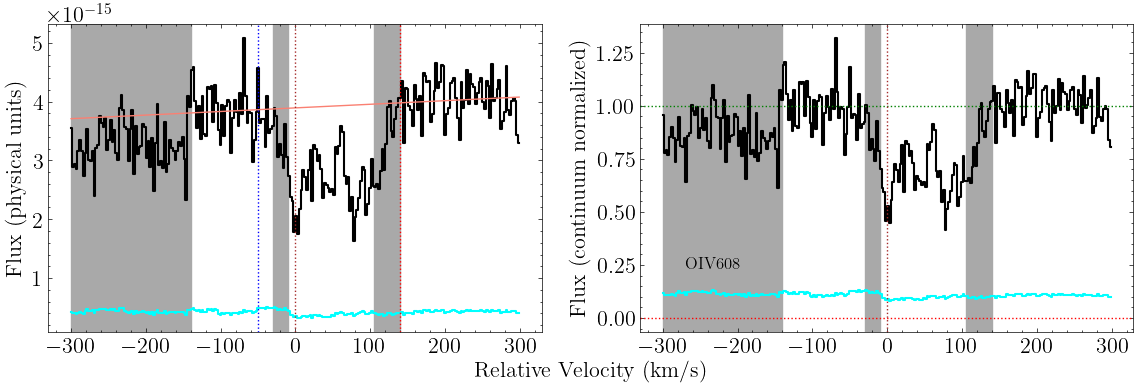

In [89]:
fig, ax = oiv_608_104.plot_ion_transition_spec_cont()

## OV

### OV 629

In [90]:
ov_629_104 = ion_transition('OV', 629, 'O', z_104, 'FUV')

In [91]:
ov_629_104.grab_ion_transition_info()

In [92]:
ov_629_104.grab_ion_transition_spec(spec_fits_list)

In [93]:
ov_629_104.cont_norm_flux(v_abs_range=[-60,170], degree=1)

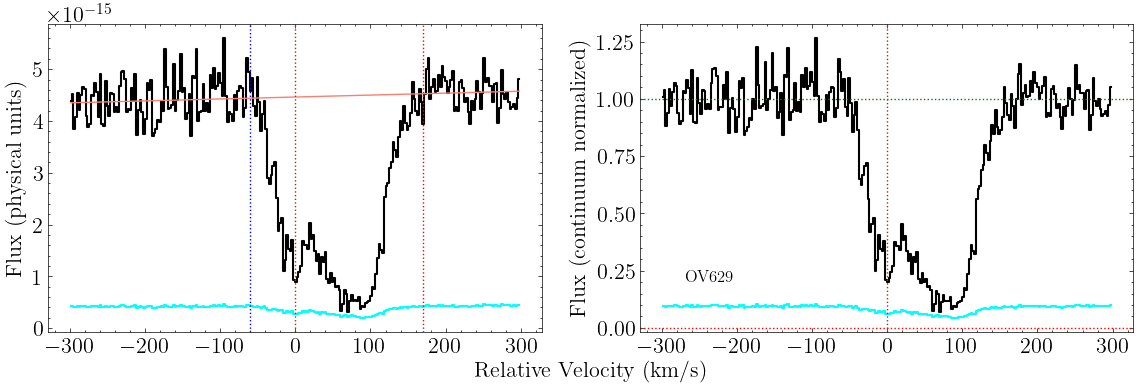

In [94]:
fig, ax = ov_629_104.plot_ion_transition_spec_cont()

# z=1.09

In [95]:
z_109 = 1.09456549

## CIV

### CIV 1548

In [96]:
civ_1548_109 = ion_transition('CIV', 1548, 'C', z_109, 'HIRES')

In [97]:
civ_1548_109.grab_ion_transition_info()

In [98]:
civ_1548_109.grab_ion_transition_spec(spec_fits_list)

In [99]:
civ_1548_109.cont_norm_flux(v_abs_range=[-50,50], degree=1)

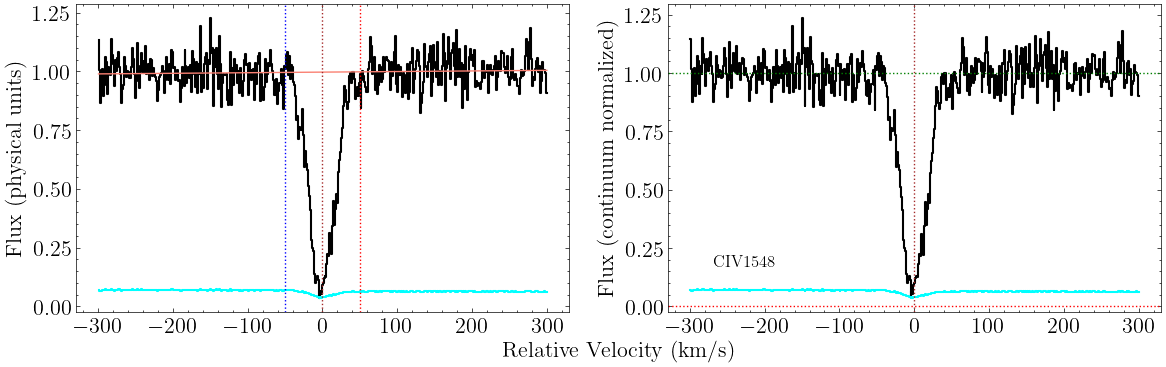

In [100]:
fig, ax = civ_1548_109.plot_ion_transition_spec_cont()

### CIV 1550

In [101]:
civ_1550_109 = ion_transition('CIV', 1550, 'C', z_109, 'HIRES')

In [102]:
civ_1550_109.grab_ion_transition_info()

In [103]:
civ_1550_109.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]])

In [104]:
civ_1550_109.cont_norm_flux(v_abs_range=[-40,55], degree=1)

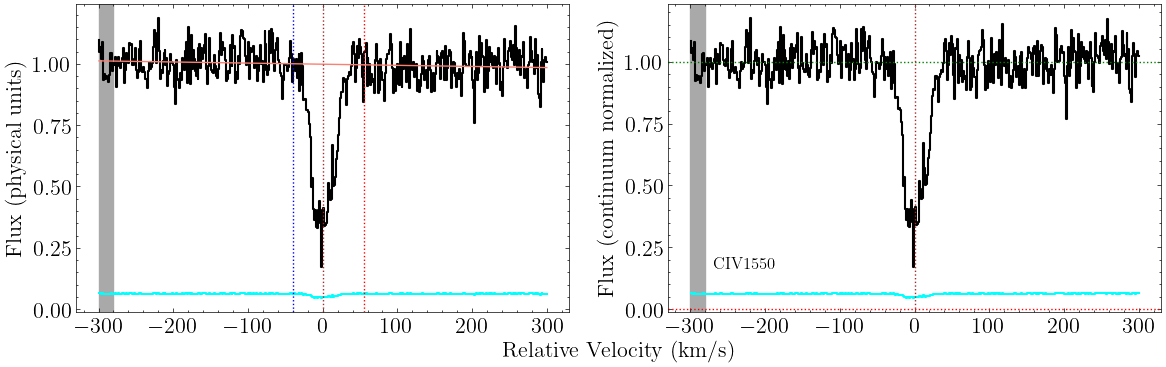

In [105]:
fig, ax = civ_1550_109.plot_ion_transition_spec_cont()

## OIV

### OIV 608

In [106]:
oiv_608_109 = ion_transition('OIV', 608, 'O', z_109, 'FUV')

In [107]:
oiv_608_109.grab_ion_transition_info(delta_v=-4.3)

In [108]:
oiv_608_109.grab_ion_transition_spec(spec_fits_list)

In [109]:
oiv_608_109.cont_norm_flux(v_abs_range=[-50,50], degree=1)

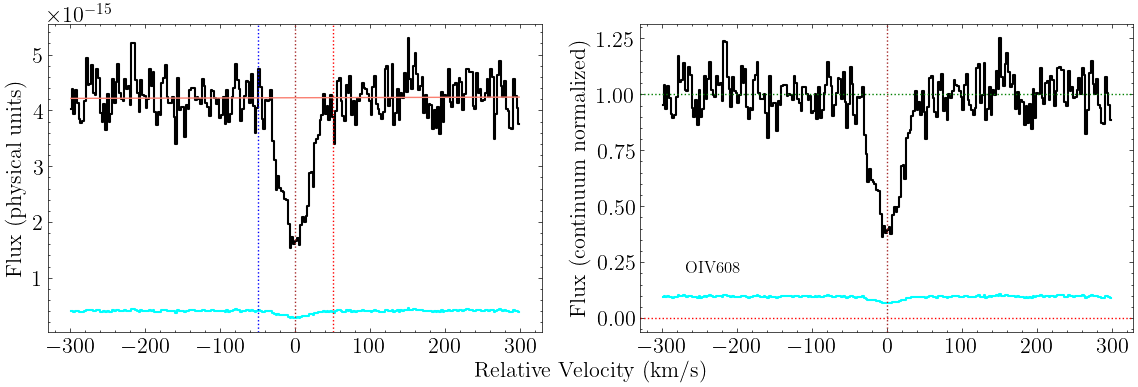

In [110]:
fig, ax = oiv_608_109.plot_ion_transition_spec_cont()

## OV

### OV 629

In [111]:
ov_629_109 = ion_transition('OV', 629, 'O', z_109, 'FUV')

In [112]:
ov_629_109.grab_ion_transition_info(delta_v=6.7)

In [113]:
ov_629_109.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-240],[110,250]])

In [114]:
ov_629_109.cont_norm_flux(v_abs_range=[-80,80], degree=1)

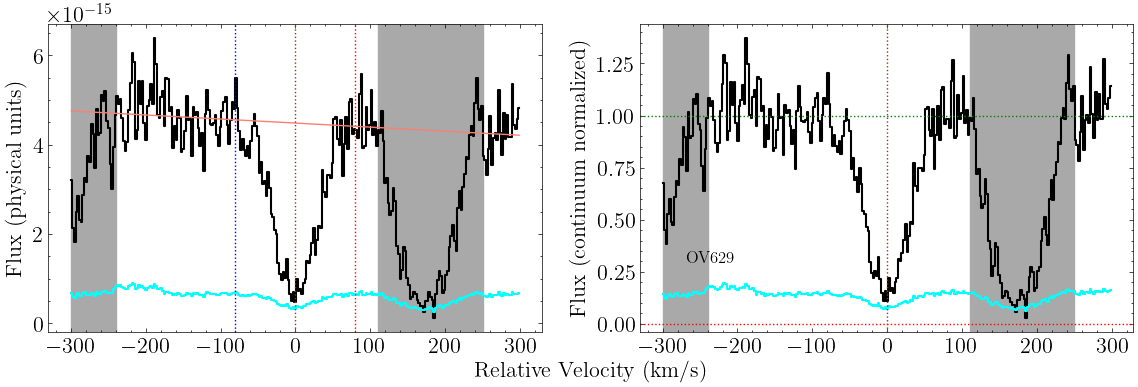

In [115]:
fig, ax = ov_629_109.plot_ion_transition_spec_cont()

# z = 1.16

In [116]:
z_116 = 1.16590988

## CIV

### CIV 1548

In [117]:
civ_1548_116 = ion_transition('CIV', 1548, 'C', z_116, 'HIRES')

In [118]:
civ_1548_116.grab_ion_transition_info()

In [119]:
civ_1548_116.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300])

In [120]:
civ_1548_116.cont_norm_flux(v_abs_range=[-70,40], degree=1)

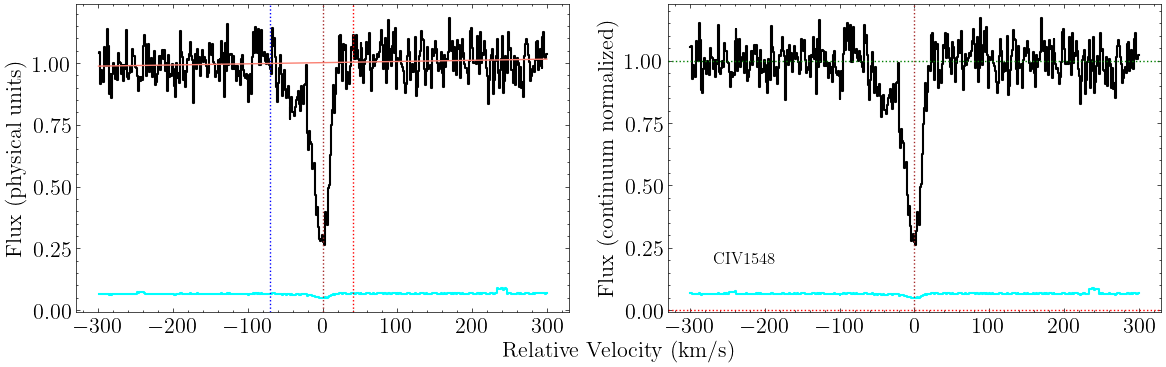

In [121]:
fig, ax = civ_1548_116.plot_ion_transition_spec_cont()

### CIV 1550

In [122]:
civ_1550_116 = ion_transition('CIV', 1550, 'C', z_116, 'HIRES')

In [123]:
civ_1550_116.grab_ion_transition_info()

In [124]:
civ_1550_116.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]])

In [125]:
civ_1550_116.cont_norm_flux(v_abs_range=[-50,50], degree=1)

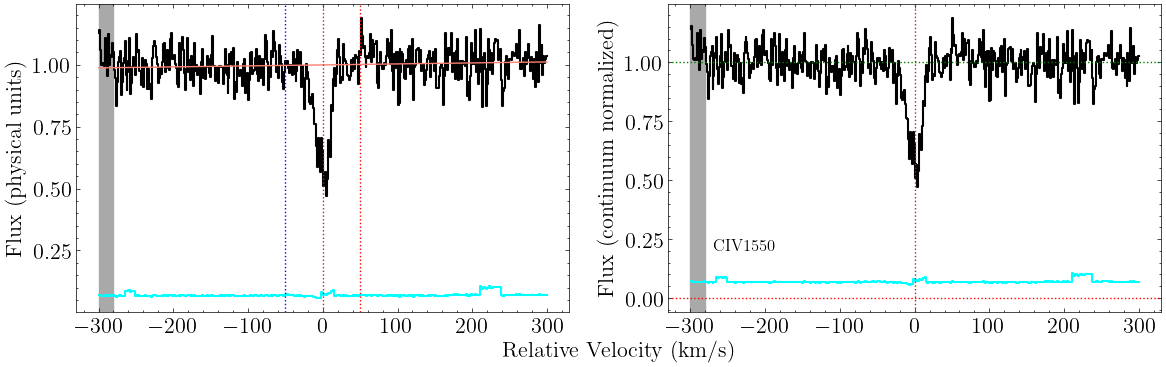

In [126]:
fig, ax = civ_1550_116.plot_ion_transition_spec_cont()

## OIV

### OIV 787

In [127]:
oiv_787_116 = ion_transition('OIV', 787, 'O', z_116, 'FUV')

In [128]:
oiv_787_116.grab_ion_transition_info()

In [129]:
oiv_787_116.grab_ion_transition_spec(spec_fits_list, masks=[[-150,-100],[145,200]])

In [130]:
oiv_787_116.cont_norm_flux(v_abs_range=[-75,65], degree=1)

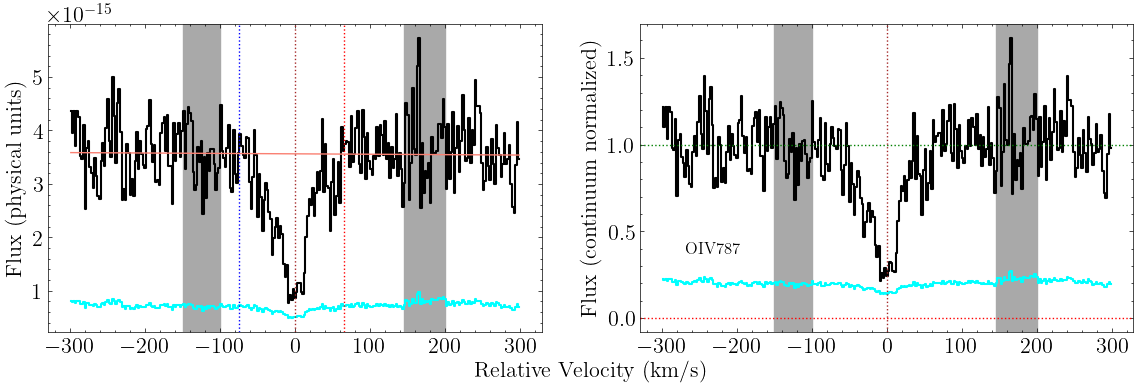

In [131]:
fig, ax = oiv_787_116.plot_ion_transition_spec_cont()

## OV

### OV 629

In [132]:
ov_629_116 = ion_transition('OV', 629, 'O', z_116, 'FUV')

In [133]:
ov_629_116.grab_ion_transition_info()

In [134]:
ov_629_116.grab_ion_transition_spec(spec_fits_list)

In [135]:
ov_629_116.cont_norm_flux(v_abs_range=[-110,50], degree=1)

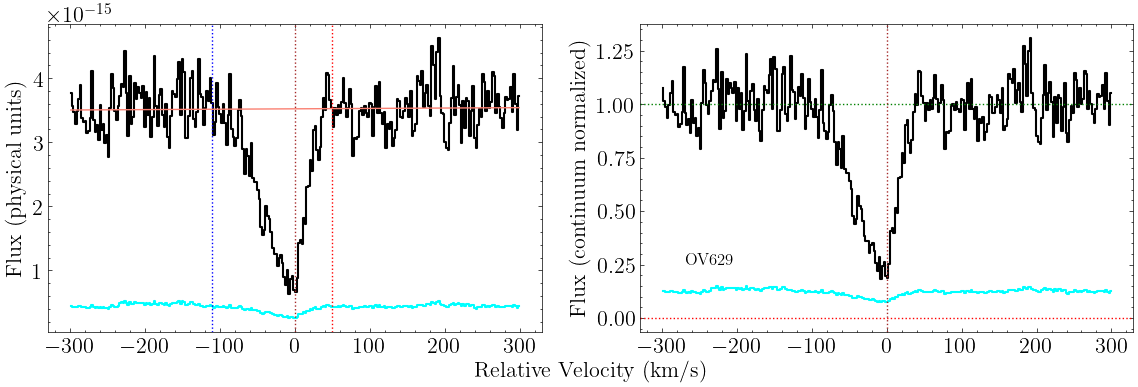

In [136]:
fig, ax = ov_629_116.plot_ion_transition_spec_cont()

# z=1.22

In [137]:
z_122 = 1.22540771

## CIV

### CIV 1548

In [138]:
civ_1548_122 = ion_transition('CIV', 1548, 'C', z_122, 'HIRES')

In [139]:
civ_1548_122.grab_ion_transition_info()

In [140]:
civ_1548_122.grab_ion_transition_spec(spec_fits_list)

In [141]:
civ_1548_122.cont_norm_flux(v_abs_range=[-50,50], degree=1)

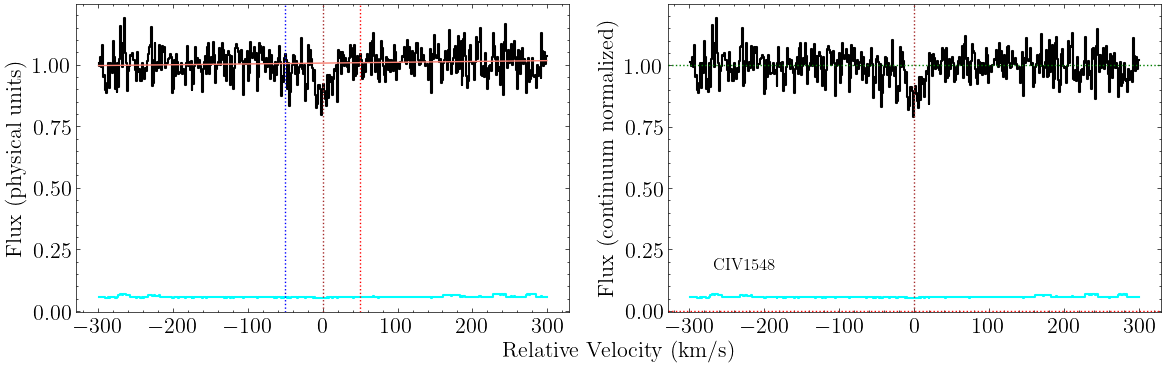

In [142]:
fig, ax = civ_1548_122.plot_ion_transition_spec_cont()

### CIV 1550

In [143]:
civ_1550_122 = ion_transition('CIV', 1550, 'C', z_122, 'HIRES')

In [144]:
civ_1550_122.grab_ion_transition_info()

In [145]:
civ_1550_122.grab_ion_transition_spec(spec_fits_list, masks=[[60,130]])

In [146]:
civ_1550_122.cont_norm_flux(v_abs_range=[-50,50], degree=1)

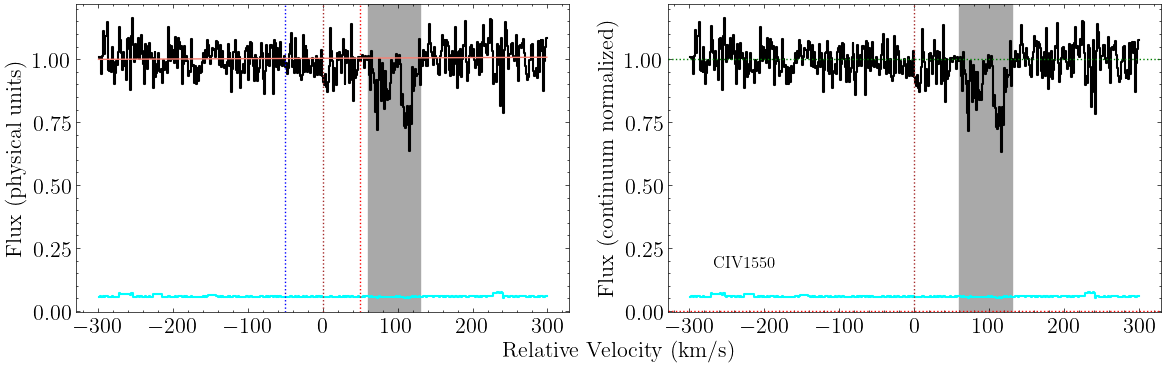

In [147]:
fig, ax = civ_1550_122.plot_ion_transition_spec_cont()

## OIV

### OIV 554

In [148]:
oiv_554_122 = ion_transition('OIV', 554, 'O', z_122, 'FUV')

In [149]:
oiv_554_122.grab_ion_transition_info()

In [150]:
oiv_554_122.grab_ion_transition_spec(spec_fits_list, masks=[[110,240]])

In [151]:
oiv_554_122.cont_norm_flux(v_abs_range=[-70,50], degree=1)

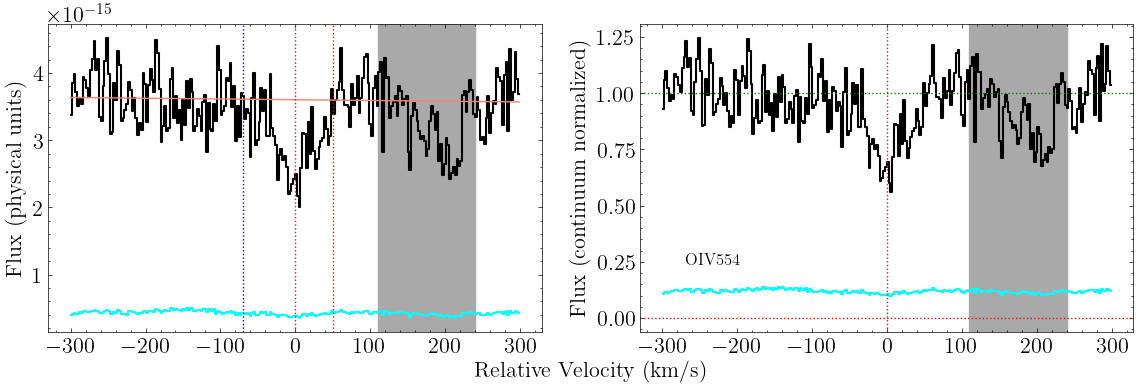

In [152]:
fig, ax = oiv_554_122.plot_ion_transition_spec_cont()

## OV

### OV 629

In [153]:
ov_629_122 = ion_transition('OV', 629, 'O', z_122, 'FUV')

In [154]:
ov_629_122.grab_ion_transition_info(delta_v=-5.2)

In [155]:
ov_629_122.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-200], [50,150], [200,300]])

In [156]:
ov_629_122.cont_norm_flux(v_abs_range=[-70,50], degree=1)

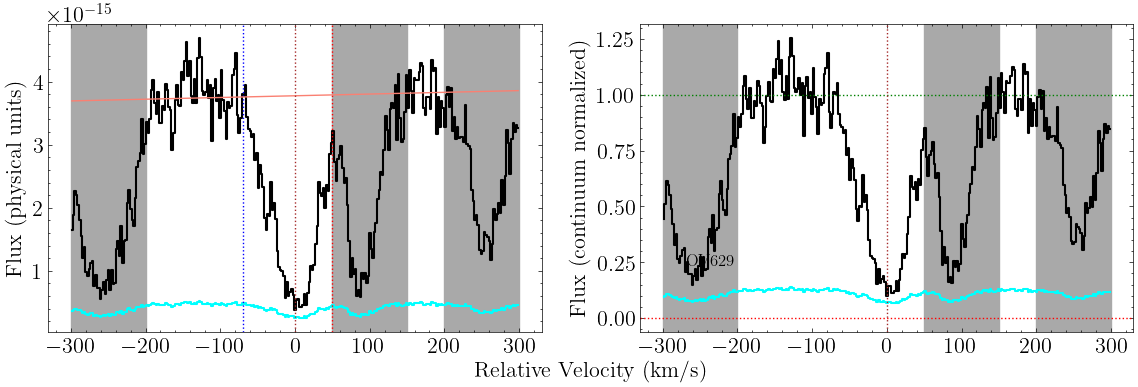

In [157]:
fig, ax = ov_629_122.plot_ion_transition_spec_cont()

# z=1.26

In [158]:
z_126 = 1.25937372

## CIV

### CIV 1548

In [159]:
civ_1548_126 = ion_transition('CIV', 1548, 'C', z_126, 'HIRES')

In [160]:
civ_1548_126.grab_ion_transition_info()

In [161]:
civ_1548_126.grab_ion_transition_spec(spec_fits_list)

In [162]:
civ_1548_126.cont_norm_flux(v_abs_range=[-50,50], degree=1)

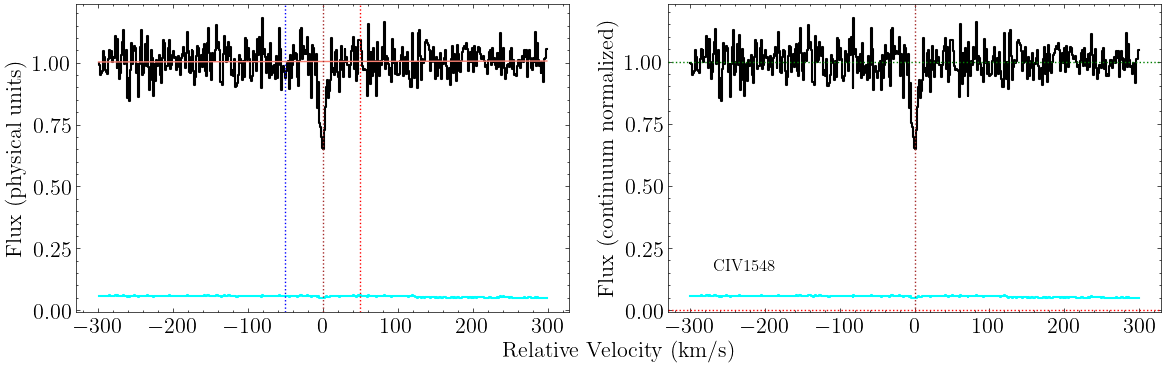

In [163]:
fig, ax = civ_1548_126.plot_ion_transition_spec_cont()

### CIV 1550

In [164]:
civ_1550_126 = ion_transition('CIV', 1550, 'C', z_126, 'HIRES')

In [165]:
civ_1550_126.grab_ion_transition_info()

In [166]:
civ_1550_126.grab_ion_transition_spec(spec_fits_list)

In [167]:
civ_1550_126.cont_norm_flux(v_abs_range=[-50,50], degree=1)

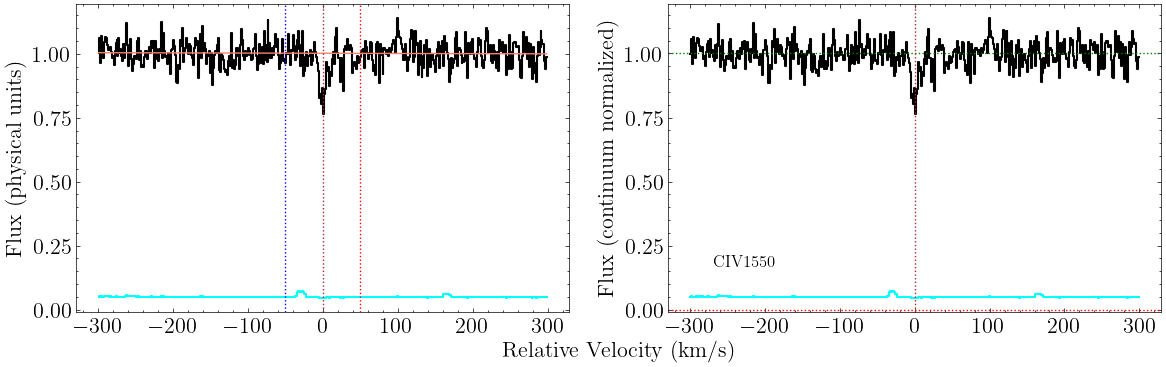

In [168]:
fig, ax = civ_1550_126.plot_ion_transition_spec_cont()

## OIV

### OIV 554

In [169]:
oiv_554_126 = ion_transition('OIV', 554, 'O', z_126, 'FUV')

In [170]:
oiv_554_126.grab_ion_transition_info(delta_v=-2.21)

In [171]:
oiv_554_126.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-60],[20,100],[140,300]])

In [172]:
oiv_554_126.cont_norm_flux(v_abs_range=[-30,20], degree=1)

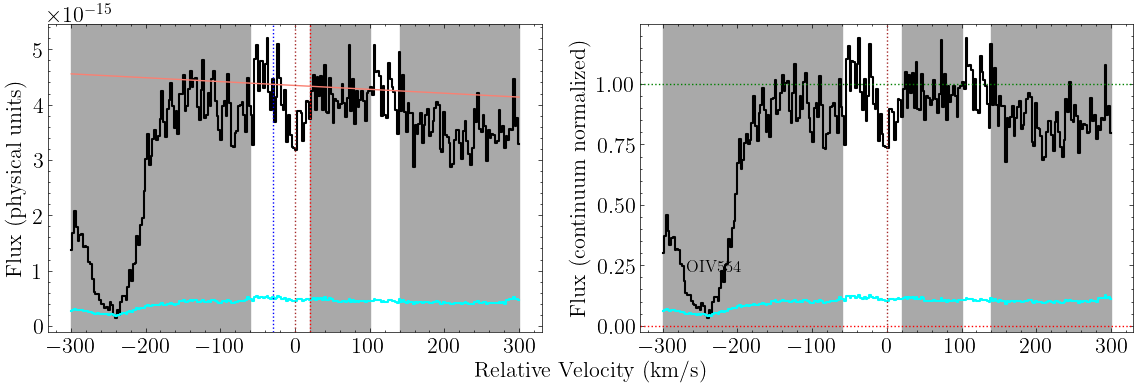

In [173]:
fig, ax = oiv_554_126.plot_ion_transition_spec_cont()

# z=1.27

In [174]:
z_127 = 1.27767328

## CIV

### CIV 1548

In [175]:
civ_1548_127 = ion_transition('CIV', 1548, 'C', z_127, 'HIRES')

In [176]:
civ_1548_127.grab_ion_transition_info()

In [177]:
civ_1548_127.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300])

In [178]:
civ_1548_127.cont_norm_flux(v_abs_range=[-50,80], degree=1)

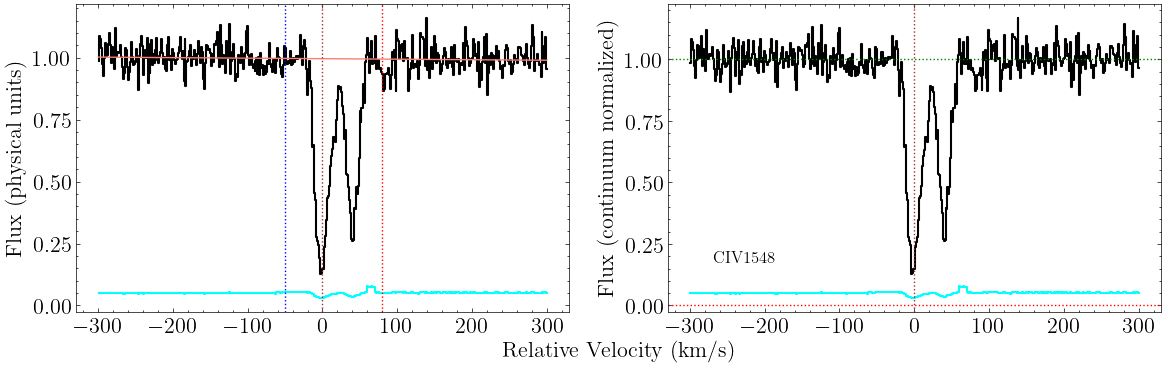

In [179]:
fig, ax = civ_1548_127.plot_ion_transition_spec_cont()

### CIV 1550

In [180]:
civ_1550_127 = ion_transition('CIV', 1550, 'C', z_127, 'HIRES')

In [181]:
civ_1550_127.grab_ion_transition_info()

In [182]:
civ_1550_127.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300])

In [183]:
civ_1550_127.cont_norm_flux(v_abs_range=[-40,70], degree=1)

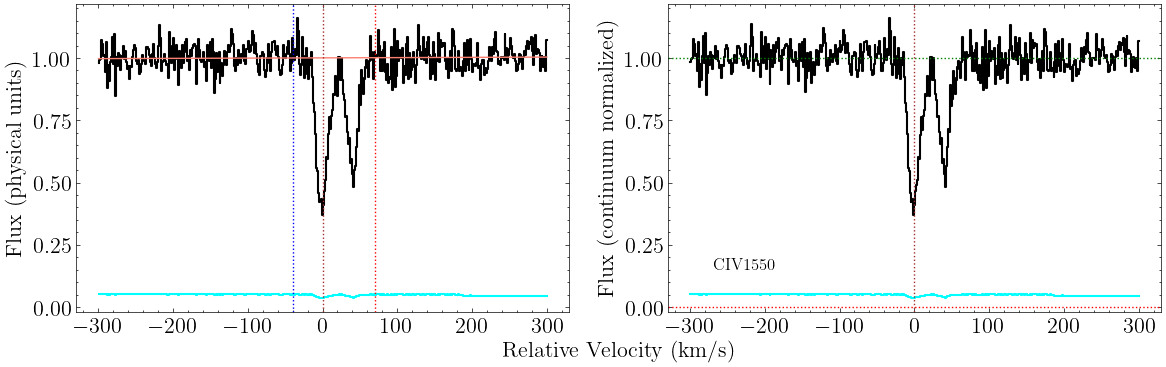

In [184]:
fig, ax = civ_1550_127.plot_ion_transition_spec_cont()

## OIV

### OIV 554

In [185]:
oiv_554_127 = ion_transition('OIV', 554, 'O', z_127, 'FUV')

In [186]:
oiv_554_127.grab_ion_transition_info()

In [187]:
oiv_554_127.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-120],[60,110]])

In [188]:
oiv_554_127.cont_norm_flux(v_abs_range=[-70,110], degree=1)

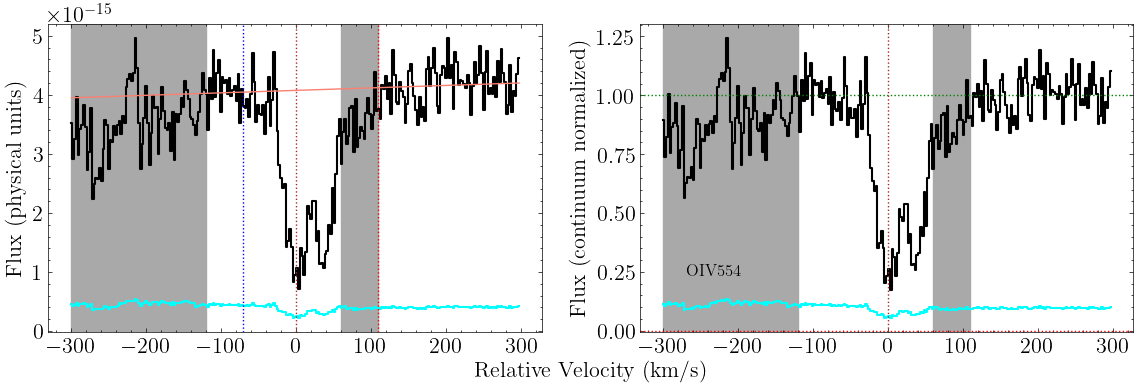

In [189]:
fig, ax = oiv_554_127.plot_ion_transition_spec_cont()

# Composite profile

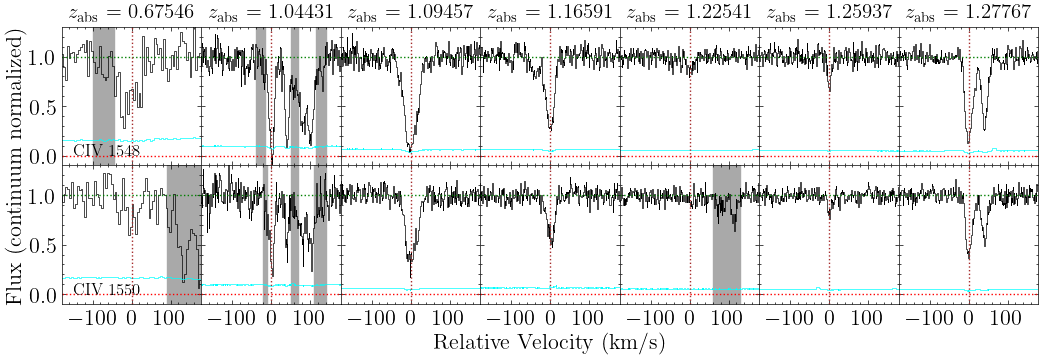

In [190]:
fig, axes = plt.subplots(2, 7, figsize=(1.8*7, 1.8*2), sharex=True, sharey=True)

axes[0,0].set_xlim(-179, 179)
axes[0,0].set_ylim(-0.1, 1.3)

civ_1548_067.plot_ion_transition_spec(fig = fig, ax = axes[0,0], label_axes=False, label_ion=False)
civ_1550_067.plot_ion_transition_spec(fig = fig, ax = axes[1,0], label_axes=False, label_ion=False)
axes[0,0].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_067, 5)), fontsize=15)
axes[0,0].text(-150, 0, 'CIV 1548', fontsize=12)
axes[1,0].text(-150, 0, 'CIV 1550', fontsize=12)

civ_1548_104.plot_ion_transition_spec(fig = fig, ax = axes[0,1], label_axes=False, label_ion=False)
civ_1550_104.plot_ion_transition_spec(fig = fig, ax = axes[1,1], label_axes=False, label_ion=False)
axes[0,1].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_104, 5)), fontsize=15)

civ_1548_109.plot_ion_transition_spec(fig = fig, ax = axes[0,2], label_axes=False, label_ion=False)
civ_1550_109.plot_ion_transition_spec(fig = fig, ax = axes[1,2], label_axes=False, label_ion=False)
axes[0,2].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_109, 5)), fontsize=15)

civ_1548_116.plot_ion_transition_spec(fig = fig, ax = axes[0,3], label_axes=False, label_ion=False)
civ_1550_116.plot_ion_transition_spec(fig = fig, ax = axes[1,3], label_axes=False, label_ion=False)
axes[0,3].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_116, 5)), fontsize=15)

civ_1548_122.plot_ion_transition_spec(fig = fig, ax = axes[0,4], label_axes=False, label_ion=False)
civ_1550_122.plot_ion_transition_spec(fig = fig, ax = axes[1,4], label_axes=False, label_ion=False)
axes[0,4].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_122, 5)), fontsize=15)

civ_1548_126.plot_ion_transition_spec(fig = fig, ax = axes[0,5], label_axes=False, label_ion=False)
civ_1550_126.plot_ion_transition_spec(fig = fig, ax = axes[1,5], label_axes=False, label_ion=False)
axes[0,5].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_126, 5)), fontsize=15)

civ_1548_127.plot_ion_transition_spec(fig = fig, ax = axes[0,6], label_axes=False, label_ion=False)
civ_1550_127.plot_ion_transition_spec(fig = fig, ax = axes[1,6], label_axes=False, label_ion=False)
axes[0,6].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_127, 5)), fontsize=15)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel('Relative Velocity (km/s)', labelpad=20) # Use argument `labelpad` to move label downwards.
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=25)

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig(rootdir+'Figures/CIV_profiles.pdf', dpi=300)
plt.savefig(rootdir+'Figures/CIV_profiles.png', dpi=300)

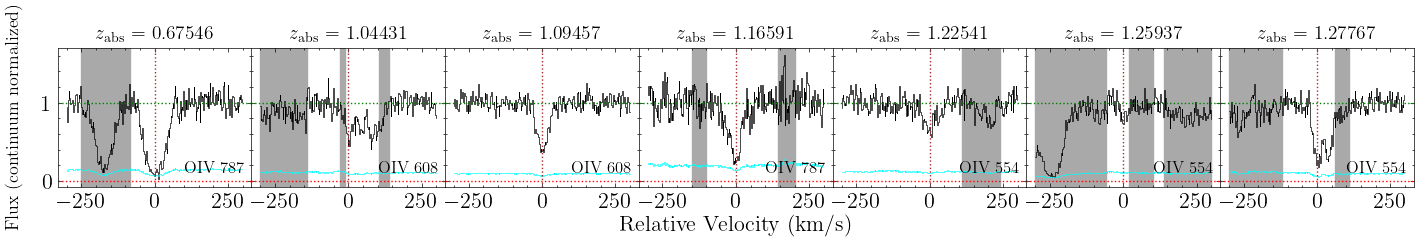

In [191]:
fig, axes = plt.subplots(1, 7, figsize=(2.5*7, 1.8*1), sharex=True, sharey=True)

oiv_787_067.plot_ion_transition_spec(fig = fig, ax = axes[0], label_axes=False, label_ion=False)
axes[0].text(100,0.1, 'OIV 787', fontsize=12)
axes[0].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_067, 5)), fontsize=14)

oiv_608_104.plot_ion_transition_spec(fig = fig, ax = axes[1], label_axes=False, label_ion=False)
axes[1].text(100,0.1, 'OIV 608', fontsize=12)
axes[1].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_104, 5)), fontsize=14)

oiv_608_109.plot_ion_transition_spec(fig = fig, ax = axes[2], label_axes=False, label_ion=False)
axes[2].text(100,0.1, 'OIV 608', fontsize=12)
axes[2].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_109, 5)), fontsize=14)

oiv_787_116.plot_ion_transition_spec(fig = fig, ax = axes[3], label_axes=False, label_ion=False)
axes[3].text(100,0.1, 'OIV 787', fontsize=12)
axes[3].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_116, 5)), fontsize=14)

oiv_554_122.plot_ion_transition_spec(fig = fig, ax = axes[4], label_axes=False, label_ion=False)
axes[4].text(100,0.1, 'OIV 554', fontsize=12)
axes[4].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_122, 5)), fontsize=14)

oiv_554_126.plot_ion_transition_spec(fig = fig, ax = axes[5], label_axes=False, label_ion=False)
axes[5].text(100,0.1, 'OIV 554', fontsize=12)
axes[5].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_126, 5)), fontsize=14)

oiv_554_127.plot_ion_transition_spec(fig = fig, ax = axes[6], label_axes=False, label_ion=False)
axes[6].text(100,0.1, 'OIV 554', fontsize=12)
axes[6].set_title(r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_127, 5)), fontsize=14)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel('Relative Velocity (km/s)', labelpad=20) # Use argument `labelpad` to move label downwards.
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=25, fontsize=13)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/OIV_profiles.pdf', dpi=300)

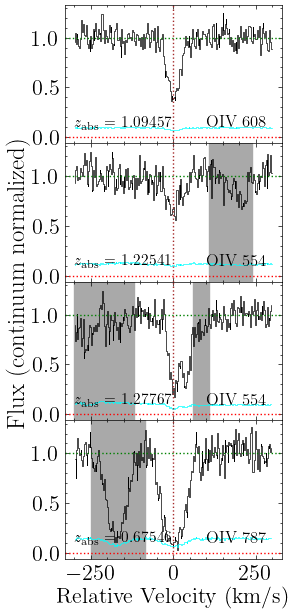

In [192]:
fig, axes = plt.subplots(4, 1, figsize=(2.8, 1.8*4), sharex=True, sharey=True)

oiv_787_067.plot_ion_transition_spec(fig = fig, ax = axes[3], label_axes=False, label_ion=False)
axes[3].text(100,0.1, 'OIV 787', fontsize=12)
axes[3].text(-300,0.1, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_067, 5)), fontsize=11)

oiv_608_109.plot_ion_transition_spec(fig = fig, ax = axes[0], label_axes=False, label_ion=False)
axes[0].text(100,0.1, 'OIV 608', fontsize=12)
axes[0].text(-300,0.1, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_109, 5)), fontsize=11)

oiv_554_122.plot_ion_transition_spec(fig = fig, ax = axes[1], label_axes=False, label_ion=False)
axes[1].text(100,0.1, 'OIV 554', fontsize=12)
axes[1].text(-300,0.1, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_122, 5)), fontsize=11)

oiv_554_127.plot_ion_transition_spec(fig = fig, ax = axes[2], label_axes=False, label_ion=False)
axes[2].text(100,0.1, 'OIV 554', fontsize=12)
axes[2].text(-300,0.1, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_127, 5)), fontsize=11)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel('Relative Velocity (km/s)', labelpad=20) # Use argument `labelpad` to move label downwards.
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=25, fontsize=18)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/OIV_profiles.png', dpi=300)

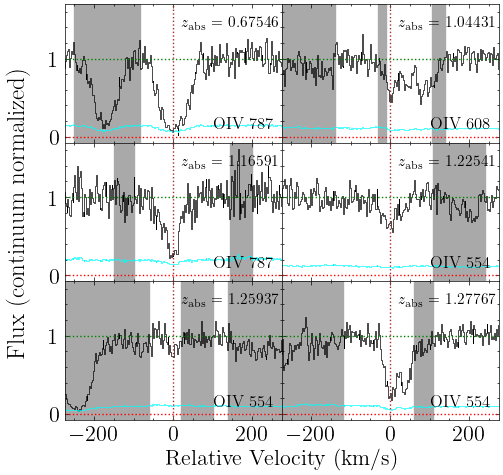

In [193]:
fig, axes = plt.subplots(3, 2, figsize=(2.8*2, 1.8*3), sharex=True, sharey=True)

oiv_787_067.plot_ion_transition_spec(fig = fig, ax = axes[0,0], label_axes=False, label_ion=False)
axes[0,0].set_xlim(-275,275)
axes[0,0].text(100,0.1, 'OIV 787', fontsize=12)
axes[0,0].text(20,1.4, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_067, 5)), fontsize=11)

oiv_608_104.plot_ion_transition_spec(fig = fig, ax = axes[0,1], label_axes=False, label_ion=False)
axes[0,1].text(100,0.1, 'OIV 608', fontsize=12)
axes[0,1].text(20,1.4, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_104, 5)), fontsize=11)

oiv_787_116.plot_ion_transition_spec(fig = fig, ax = axes[1,0], label_axes=False, label_ion=False)
axes[1,0].text(100,0.1, 'OIV 787', fontsize=12)
axes[1,0].text(20,1.4, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_116, 5)), fontsize=11)

oiv_554_122.plot_ion_transition_spec(fig = fig, ax = axes[1,1], label_axes=False, label_ion=False)
axes[1,1].text(100,0.1, 'OIV 554', fontsize=12)
axes[1,1].text(20,1.4, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_122, 5)), fontsize=11)

oiv_554_126.plot_ion_transition_spec(fig = fig, ax = axes[2,0], label_axes=False, label_ion=False)
axes[2,0].text(100,0.1, 'OIV 554', fontsize=12)
axes[2,0].text(20,1.4, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_126, 5)), fontsize=11)

oiv_554_127.plot_ion_transition_spec(fig = fig, ax = axes[2,1], label_axes=False, label_ion=False)
axes[2,1].text(100,0.1, 'OIV 554', fontsize=12)
axes[2,1].text(20,1.4, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_127, 5)), fontsize=11)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel('Relative Velocity (km/s)', labelpad=20) # Use argument `labelpad` to move label downwards.
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=25, fontsize=18)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/OIV_profiles.pdf', dpi=300)

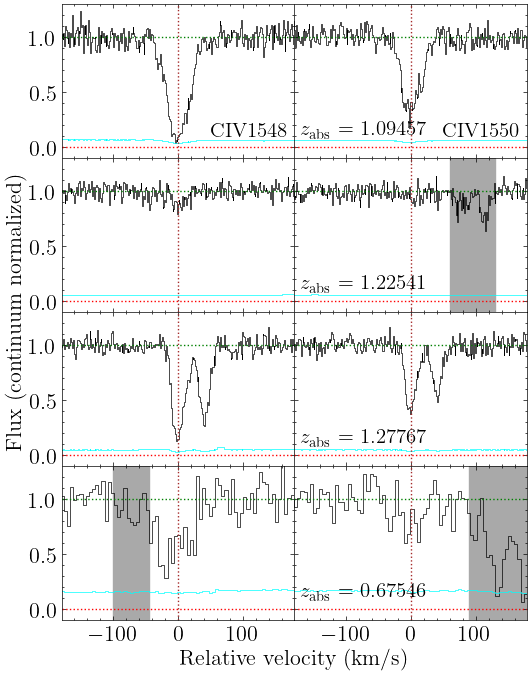

In [194]:
fig, axes = plt.subplots(4, 2, figsize=(3*2, 2*4), sharex=True, sharey=True)

civ_1548_109.plot_ion_transition_spec(fig = fig, ax = axes[0,0], label_axes=False, label_ion=False)
civ_1550_109.plot_ion_transition_spec(fig = fig, ax = axes[0,1], label_axes=False, label_ion=False)
axes[0,1].text(-170, 0.1, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_109, 5)), fontsize=15)
axes[0,0].text(50, 0.1, r'CIV1548', fontsize=15)
axes[0,1].text(50, 0.1, r'CIV1550', fontsize=15)

axes[0,0].set_xlim(-179, 179)
axes[0,0].set_ylim(-0.1, 1.3)

civ_1548_122.plot_ion_transition_spec(fig = fig, ax = axes[1,0], label_axes=False, label_ion=False)
civ_1550_122.plot_ion_transition_spec(fig = fig, ax = axes[1,1], label_axes=False, label_ion=False)
axes[1,1].text(-170, 0.1, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_122, 5)), fontsize=15)

civ_1548_127.plot_ion_transition_spec(fig = fig, ax = axes[2,0], label_axes=False, label_ion=False)
civ_1550_127.plot_ion_transition_spec(fig = fig, ax = axes[2,1], label_axes=False, label_ion=False)
axes[2,1].text(-170, 0.1, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_127, 5)), fontsize=15)

civ_1548_067.plot_ion_transition_spec(fig = fig, ax = axes[3,0], label_axes=False, label_ion=False)
civ_1550_067.plot_ion_transition_spec(fig = fig, ax = axes[3,1], label_axes=False, label_ion=False)
axes[3,1].text(-170, 0.1, r'$z_\mathrm{abs}$ = ' + '{}'.format(np.round(z_067, 5)), fontsize=15)

ax_label = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel('Relative velocity (km/s)', labelpad=20) # Use argument `labelpad` to move label downwards.
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=25)

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/CIV_profiles.png', dpi=300)